In [1]:
import pandas as pd
import numpy as np
import csv
from collections import Counter
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [9]:
def kw_in_df(data, keyword):
    print("'", keyword, "' 가 포함된 리뷰 총", len(data[data['ReviewText'].apply(lambda x:keyword in x)]['ReviewText']),'건')
    return data[data['ReviewText'].apply(lambda x:keyword in x)]['ReviewText']

In [10]:
def kw_in_nouns(data, keyword):
    print("'", keyword, "' 가 포함된 리뷰 총", len(data[data['token_nouns_bareun'].apply(lambda x:keyword in x)]['ReviewText']),'건')
    return data[data['token_nouns_bareun'].apply(lambda x:keyword in x)]['ReviewText']

In [11]:
def frequency_analysis(data, n):
    words = pd.DataFrame(Counter(sum(data.to_list(), [])).most_common(n), columns = ['Token','Frequency'])
    return words

In [13]:
def wc_kw(data, kw_option, keyword):
    if kw_option == 1: # 1은 용언 키워드, 2는 명사 키워드
        print(keyword, '키워드가 포함된 리뷰의 용언 워드클라우드 시각화')
        return wc_analysis(data[data['ReviewText'].apply(lambda x:keyword in x)]['token_verbs_bareun'])
    elif kw_option == 2:
        print(keyword, '키워드가 포함된 리뷰의 명사 워드클라우드 시각화')
        return wc_analysis(data[data['ReviewText'].apply(lambda x:keyword in x)]['token_nouns_bareun'])
    elif kw_option == 3:
        print(keyword, '키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화')
        return wc_analysis(data[data['ReviewText'].apply(lambda x:keyword in x)]['token_nouns_bareun'] + data[data['ReviewText'].apply(lambda x:keyword in x)]['token_verbs_bareun'])
    else:
        return print('옵션 확인')

In [84]:
# 리뷰 출력시 ... 없이 전부 나오게 설정
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [12]:
#워드클라우드 함수
def wc_analysis(data):
    words = dict(Counter(sum(data.to_list(), [])).most_common(300))
    #img = Image.open("C:/Users/NT550-048/Desktop/잇더/rice.jpg")
    #imgArray = np.array(img)
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",
                        width=800, height=500).generate_from_frequencies(words)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud) 
    plt.axis('off')
    plt.show()

In [2]:
kakao_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kakao_data_preprocessed.csv", index_col=0)

In [4]:
kakao_data.rename(columns = {'review_text':'ReviewText'}, inplace = True)

In [3]:
kakao_data.head(1)

,id,name,brand,sellingPrice,wishCount,reviewCount,product_tag2,review_text,rating,review_tag1,review_tag2,review_time,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun
0,2270784,국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5,비마스터,27800,2228,1152,[],숙취후 아침에 따뜻한 물에 한포 간편히 타먹을수 있어서 좋드라구요. 스틱형이라 휴대...,4,응원,직장동료,2023-04-10 14:16:48,1,0.990664,"['숙취', '후', '아침', '물', '포', '수', '스틱', '형', '휴...","['따뜻하', '타', '먹', '있', '좋', '이', '간편하', '녹', '..."


In [5]:
kakao_data['token_nouns_bareun'] = kakao_data['token_nouns_bareun'].apply(lambda x:eval(x))
kakao_data['token_verbs_bareun'] = kakao_data['token_verbs_bareun'].apply(lambda x:eval(x))

리뷰 태그 전처리

In [13]:
kakao_data['review_tag1'].value_counts()

review_tag1
응원          739
생일          592
감사          188
위로          187
건강           28
설날           16
결혼           15
시험           15
재미           14
취업/이직        12
스승의날         10
크리스마스         9
졸업/입학         6
어버이날          4
화이트데이         4
빼빼로데이         4
새해            4
임신/출산         4
추석            3
명절선물          3
명절            3
선물            3
코로나           2
선물용           2
추석선물          2
이사/집들이        2
발렌타인데이        2
건강회복          2
아프지마          2
쾌유            1
비밀            1
피로회복          1
목감기에좋다고       1
인연            1
목감기           1
석류꿀맛최고이다      1
퓨어석류아카        1
건강영양석류        1
면역력챙기기        1
감사마음          1
연말            1
꿀빠는시간         1
회복            1
어머님선물         1
기념품           1
감사의표시         1
임직축하          1
달달하시간         1
녹차원꿀스틱        1
사과            1
달달건강꿀스틱       1
선물용으로줌        1
백일/돌          1
코로나건강         1
면역역챙기기        1
감솨            1
200일선물        1
설             1
좋습니다          1
꿀             1
벌꿀            1
프로폴리스       

In [8]:
kakao_data['review_tag2'].value_counts()

review_tag2
친구          865
직장동료        350
선/후배        209
형제/자매       121
나            97
연인           76
선생님          44
제자           37
자녀           28
부모님          26
썸            11
지인            6
조카            5
친척            2
언니            2
스트리머          1
선물            1
교회언니          1
핑크님           1
게임단톡방         1
감사합니다         1
고마운분          1
엠에이치글로비즈      1
직장            1
아들친구어머니       1
그냥선물          1
거래처선물         1
퓨어석류아카        1
동기            1
학부모님선물        1
친구딸           1
보낸이의정성        1
홀인원기념         1
나에게주는선물       1
삼실킬로미터        1
전도사님          1
학부모님          1
가족            1
생일            1
응원과건강기원       1
딸남자친구         1
건강            1
생일선물          1
선물용           1
학부형           1
형님            1
코로나응원위로       1
아이친구엄마        1
고객님           1
회원님           1
추석선물          1
동생            1
비마스터          1
학부            1
꿀             1
꿀해장           1
교회집사님         1
화줌마HZM        1
Name: count, dtype: int64

In [6]:
tag2 = ['친구', '연인', '썸', '형재/자매', '선/후배', '직장동료', '자녀', '부모님', '제자', '선생님', '나']
tag1 = ['생일', '응원', '감사', '재미', '결혼', '이사/집들이', '백일/돌', '임신/출산', '졸업/입학', '취업/이직', '시험', '위로', '사과', '반려동물', '설날', '건강', '스승의날']

In [7]:
kakao_data['review_tag1'] = kakao_data['review_tag1'].apply(lambda x:x if x in tag1 else '기타')

In [8]:
kakao_data['review_tag2'] = kakao_data['review_tag2'].apply(lambda x:x if x in tag2 else '기타')

In [36]:
kakao_data['review_tag1'].value_counts()

review_tag1
응원        739
생일        592
감사        188
위로        187
기타         92
건강         28
설날         16
시험         15
결혼         15
재미         14
취업/이직      12
스승의날       10
졸업/입학       6
임신/출산       4
이사/집들이      2
백일/돌        1
사과          1
Name: count, dtype: int64

In [35]:
kakao_data['review_tag2'].value_counts()

review_tag2
친구      865
직장동료    350
선/후배    209
기타      179
나        97
연인       76
선생님      44
제자       37
자녀       28
부모님      26
썸        11
Name: count, dtype: int64

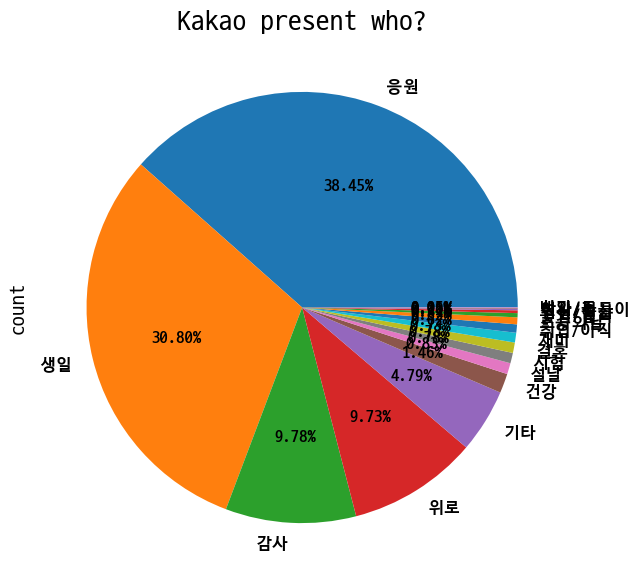

In [14]:
plt.figure(figsize=(7,7))
plt.title('Kakao present who?' , fontsize=20)
plt.ylabel('who' , fontsize=15)
kakao_data['review_tag1'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                                  textprops = {'fontsize' : 12 ,
                                                               'weight' : 'bold'})
plt.show()

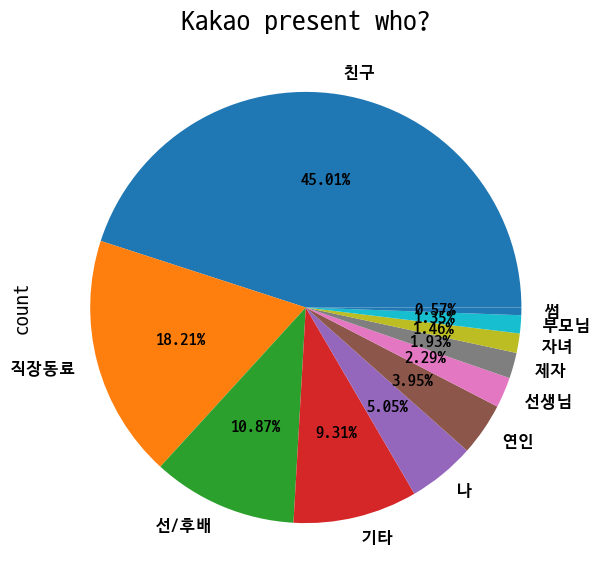

In [15]:
plt.figure(figsize=(7,7))
plt.title('Kakao present who?' , fontsize=20)
plt.ylabel('who' , fontsize=15)
kakao_data['review_tag2'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                                  textprops = {'fontsize' : 12 ,
                                                               'weight' : 'bold'})
plt.show()

In [43]:
kakao_data.head(1)

,id,name,brand,sellingPrice,wishCount,reviewCount,product_tag2,review_text,rating,review_tag1,review_tag2,review_time,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun
0,2270784,국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5,비마스터,27800,2228,1152,[],숙취후 아침에 따뜻한 물에 한포 간편히 타먹을수 있어서 좋드라구요. 스틱형이라 휴대도간편하고 물에도 잘녹아요. 주머니나 가방안에 휴대하기도간편해서 허기졌을때 간편하게 당충전하기에도 너무좋습니다. 국내산꿀이라 믿을수있고 맛도좋아요. 배송엄청빠르네요,4,응원,직장동료,2023-04-10 14:16:48,1,0.990664,"[숙취, 후, 아침, 물, 포, 수, 스틱, 형, 휴대, 물, 주머니, 가방, 안, 휴대, 때, 당, 충전, 국내, 산꿀, 수, 맛, 배송]","[따뜻하, 타, 먹, 있, 좋, 이, 간편하, 녹, 하, 간편하, 허기지, 간편하, 하, 좋, 이, 믿, 있, 좋, 빠르]"


In [47]:
kakao_noun_frequency = frequency_analysis(kakao_data['token_nouns_bareun'], 500)

In [48]:
kakao_noun_frequency.to_excel(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\frequency_excel\kakao_noun_frequency.xlsx")

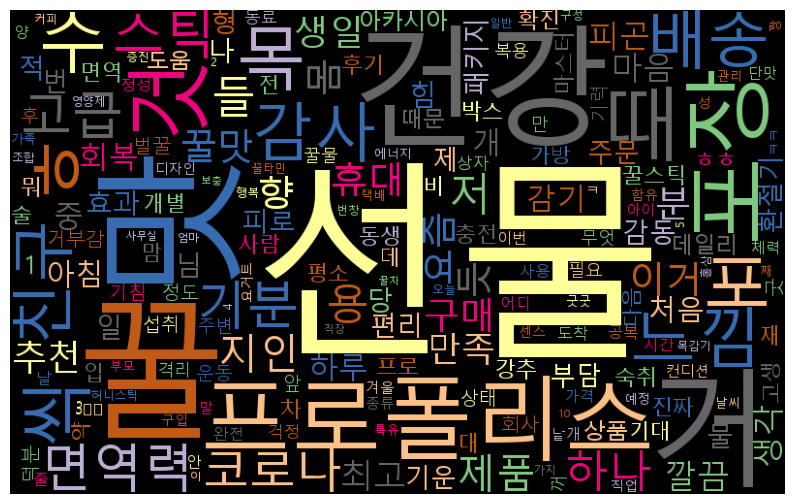

In [44]:
wc_analysis(kakao_data['token_nouns_bareun'])

가방 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


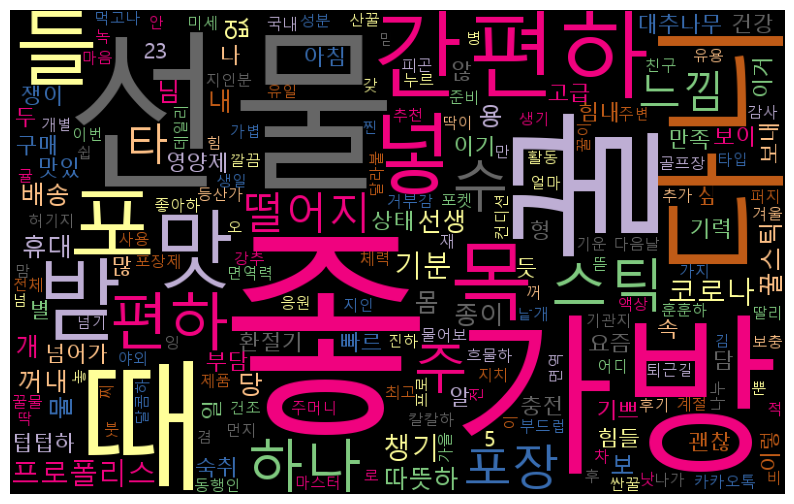

In [118]:
wc_kw(kakao_data, 3, '가방')

In [117]:
kw_in_nouns('가방')

' 가방 ' 가 포함된 리뷰 총 20 건


0                                                                                                                                                                                                                                                  숙취후 아침에 따뜻한 물에 한포 간편히 타먹을수 있어서 좋드라구요. 스틱형이라 휴대도간편하고  물에도 잘녹아요. 주머니나 가방안에 휴대하기도간편해서 허기졌을때 간편하게 당충전하기에도 너무좋습니다. 국내산꿀이라 믿을수있고 맛도좋아요. 배송엄청빠르네요
46                                                                                                                                                                                        미세먼지많은 요즘같은 환절기에 따뜻하게 한포 물에 타먹으면 칼칼해진 목 건강에 좋더라구요.항상 쟁여두고 수시로 먹고 있어요. 스틱형이라 간편해서 가방 속에 쏙 넣고 다니다 살짝 당떨어졌을때도 매우 유용했습니다.^^  숙취다음날 꿀물타먹기도 간편해서 저는 이제품. 강추합니다.  저도 카카오톡 선물하기로 간편하게 지인분들께 보냈더니 다들 좋아하시네요.
133                                                                                                                                                                                                                  가벼운느낌의 꿀스틱은 많이 먹어봤는데… 프

용언 제거

In [109]:
rm_nouns = ['것', '씩', 'ㅎ', '거', '저', 'ㅎㅎ']

In [110]:
kakao_data['token_nouns_bareun'] = kakao_data['token_nouns_bareun'].apply(lambda x:[token for token in x if token not in rm_nouns])

In [112]:
rm_verbs = ['하', '이', '있', '먹', '같', '되', '스럽', '지']

In [113]:
kakao_data['token_verbs_bareun'] = kakao_data['token_verbs_bareun'].apply(lambda x:[token for token in x if token not in rm_verbs])

In [69]:
kakao_data['token_verbs_bareun'][0]

['따뜻하',
 '타',
 '먹',
 '있',
 '좋',
 '이',
 '간편하',
 '녹',
 '하',
 '간편하',
 '허기지',
 '간편하',
 '하',
 '좋',
 '이',
 '믿',
 '있',
 '좋',
 '빠르']

In [120]:
kakao_friend = kakao_data[kakao_data['review_tag2']=='친구']

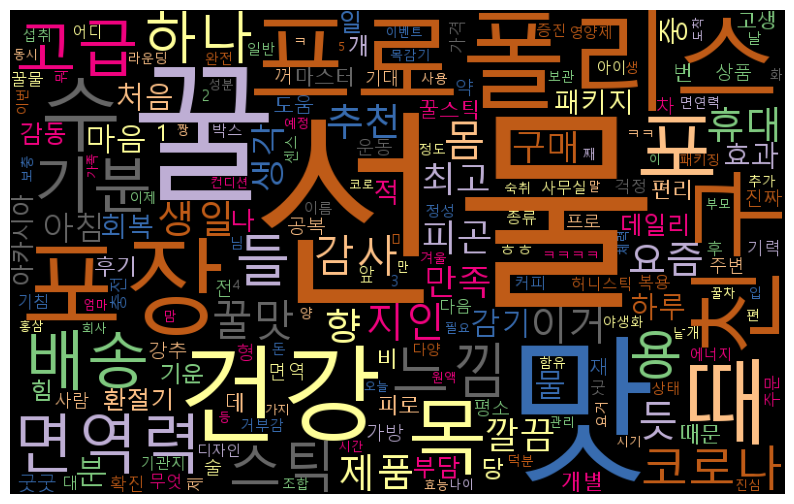

In [124]:
wc_analysis(kakao_friend['token_nouns_bareun'])

In [ ]:
frequency_analysis(kakao_friend['token_nouns_bareun'], 500)

In [ ]:
kakao_data['']

### 부정리뷰 분석

In [21]:
kurly_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_preprocessed.csv", index_col=0)
workerbee_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv", index_col=0)

In [48]:
workerbee_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv", index_col=0)

In [36]:
kurly_data['token_nouns_bareun'] = kurly_data['token_nouns_bareun'].apply(lambda x:eval(x))
kurly_data['token_verbs_bareun'] = kurly_data['token_verbs_bareun'].apply(lambda x:eval(x))

In [50]:
workerbee_data['token_nouns_bareun'] = workerbee_data['token_nouns_bareun'].apply(lambda x:eval(x))
workerbee_data['token_verbs_bareun'] = workerbee_data['token_verbs_bareun'].apply(lambda x:eval(x))

컬럼명 맞춰주기 : 리뷰, 시간

In [84]:
workerbee_data.rename(columns={'contents':'ReviewText', 'insertTimestamp':'ReviewTime',
                               'itemNo':'ProductCode', 'itemName':'ProductName'}, inplace=True)

In [30]:
kurly_data.rename(columns={'ReviewDate':'ReviewTime'}, inplace=True)

In [82]:
kakao_data.rename(columns={'review_time':'ReviewTime', 'id':'ProductCode', 'name':'ProductName'}, inplace=True)

불용어 제거

In [38]:
rm_nouns = ['것', '씩', 'ㅎ', '거', '저', 'ㅎㅎ', '들']

In [ ]:
kakao_data['token_nouns_bareun'] = kakao_data['token_nouns_bareun'].apply(lambda x:[token for token in x if token not in rm_nouns])

In [39]:
rm_verbs = ['하', '이', '있', '먹', '같', '되', '스럽', '지']

In [ ]:
kakao_data['token_verbs_bareun'] = kakao_data['token_verbs_bareun'].apply(lambda x:[token for token in x if token not in rm_verbs])

In [52]:
for data in [kurly_data, workerbee_data, kakao_data]:
    data['token_nouns_bareun'] = data['token_nouns_bareun'].apply(lambda x:[token for token in x if token not in rm_nouns])
    data['token_verbs_bareun'] = data['token_verbs_bareun'].apply(lambda x:[token for token in x if token not in rm_verbs])

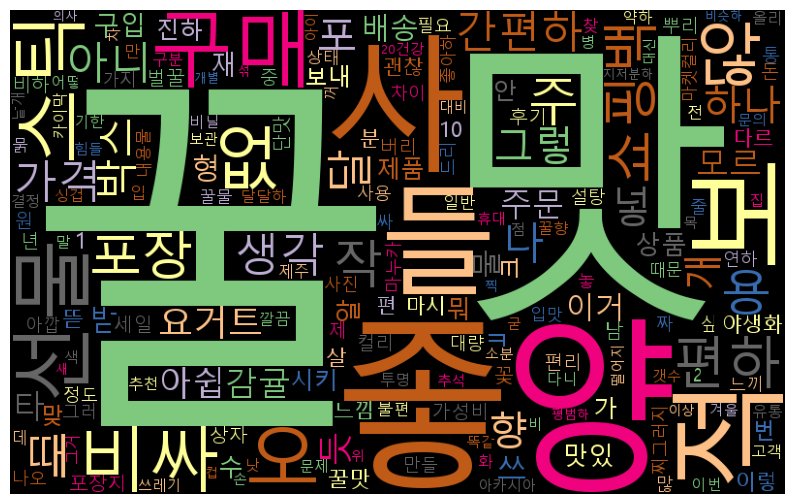

In [42]:
wc_analysis(kurly_data[kurly_data['sentiment_label']==0]['token_nouns_bareun'] + kurly_data[kurly_data['sentiment_label']==0]['token_verbs_bareun'])

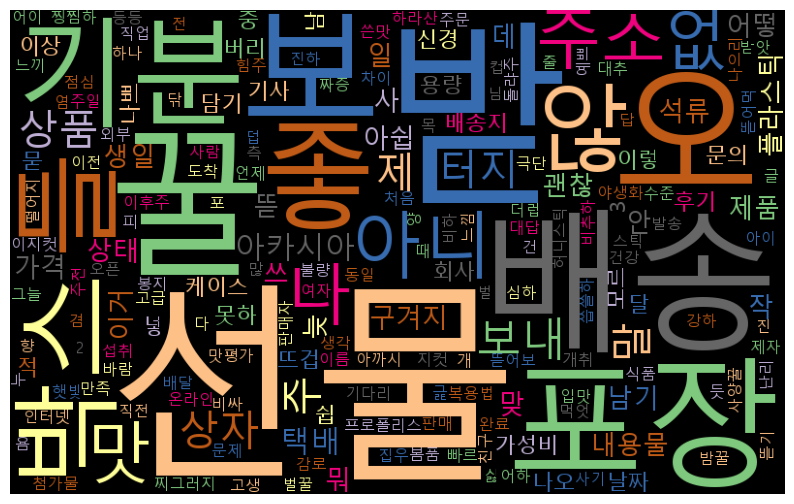

In [43]:
wc_analysis(kakao_data[kakao_data['sentiment_label']==0]['token_nouns_bareun'] + kakao_data[kakao_data['sentiment_label']==0]['token_verbs_bareun'])

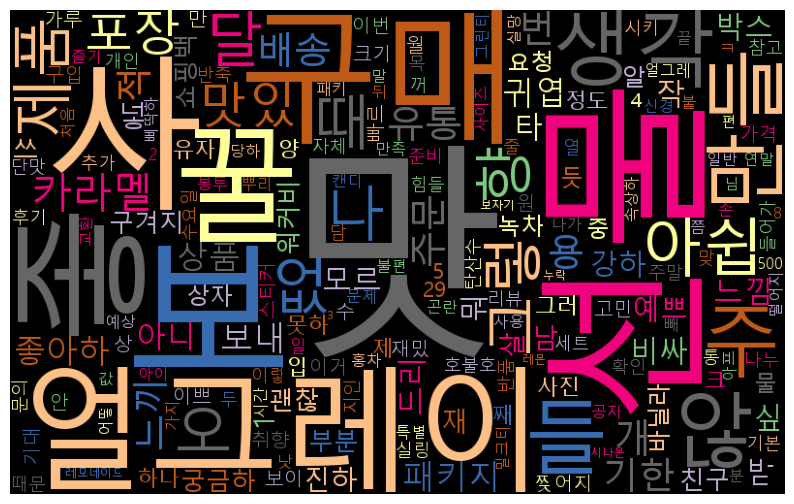

In [54]:
wc_analysis(workerbee_data[workerbee_data['sentiment_label']==0]['token_nouns_bareun'] + workerbee_data[workerbee_data['sentiment_label']==0]['token_verbs_bareun'])

In [19]:
kakao_data[kakao_data['sentiment_label']==0]['ReviewText']

193     상품은 아직 섭취전..  뜨거운 점심에 햇빛쨍해서 박스가 많이 뜨거운데 안에든 꿀은...
343     아까시 감로 피 대추 야생화 등등 별의별 꿀을 다 먹어봤지만 밤꿀보다 쓴맛이 강한 ...
468         후기 이후주는 상품은 완전 다른걸 주네요? ㅠ.  사기맞은듯 한  기분더럽습니다.
643          다른 첨가물없이 꿀과 프로폴리스만 들어있어 건강하고 진한맛 아이는 먹기 싫어함.
1040                                배송빨랐어요 포장은 글케막..예쁘진않음
1079                                   ㅡㅡ나으리 꿀이 너무달니다요 에에
1112              가성비는 만족, 배송은 동일날짜 2건의 선물을 발송 했는데 쫌 늦게 옴
1122                                          ㅠㅠ 잘 안 먹어져영
1128                                상품 안왔습니다. 왜 배송 완료인거죠?
1169                                           잘받았습니다....
1245       한컵용량의 .. 한포의 양이 너무 적어요.3개는 넣어야 맛이 좀 납니다. 아쉽네요.
1252    맛은 아직 안봐서 모르겠는데  포장좀 신경쓰세요. 저는 제가 먹으려고 주문한건데도 ...
1258                    선물로 받은건데 박스가 다 오픈되어 있는상태로 배송되어왔어요
1266                                제품박스가 다 떨어지고, 구겨져 왔어요
1278    오늘 받았습니다근데 세 봉지 중에 하나가뜯겨서  왔어요  문의글 남겼는데  아직 답...
1314                                  남에 집우로 배달온거 말곤 쵝오에염
1375    배송 상태가 너무...안 좋네요. 선물 받은 건데 상자에 담겨오긴 했지만 다 구겨지...
1394          

In [57]:
workerbee_data[workerbee_data['sentiment_label']==0]['ReviewText']

14      생각보다 제입맛에는 별로,, 근데 친구는 맛있다고 하더라고요 친구 다 줬습니다,,ㅠ...
25                                        얼그레이 향이 꽤 강해요..
47      궁금해서 사봤어요!! 생각보다 얼그레이 향이 강해요ㅎㅎ 다시 사먹을 거 같진 않아요...
52      유통기한이 촉박해요.  내일모레면 5월인데 유통기한이 8월까지인 제품이 왔어요. 두...
58      선물욘으로는 괜찮은데 솔직히 너무달아요 단 거 좋아하는 편인데도 뱉고 싶었어여 그냥...
                              ...                        
4790    구성품중 카라멜은 맛있었어요 꿀은 알수없는 까만가루가 있어  냄새만 맡고 방치  통...
4827    생각보다 되게 작네요ㅠ 선물해야하는데 겉보기에 되게 볼품없어보어요 아쉽네요 꿀로 살...
4975                                   비싼편인거 같아요 너무 작더라고요
5071    선생님께 오랜만에 만나서 드리려고 샀는데 귀엽긴한데.... 좀 약한 것 같습니다  ...
5107    친구 두명에게 선물했는데 이 친구는 별로 안 좋아 했네요. 선물로 하려면 미리 잘 ...
Name: ReviewText, Length: 145, dtype: object

In [89]:
workerbee_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv")

In [90]:
kurly_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_preprocessed.csv")

In [91]:
kakao_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kakao_data_preprocessed.csv")

In [68]:
kakao_data.head(1)

,id,name,brand,sellingPrice,wishCount,reviewCount,product_tag2,ReviewText,rating,review_tag1,review_tag2,ReviewTime,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun
0,2270784,국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5,비마스터,27800,2228,1152,[],숙취후 아침에 따뜻한 물에 한포 간편히 타먹을수 있어서 좋드라구요. 스틱형이라 휴대...,4,응원,직장동료,2023-04-10 14:16:48,1,0.990664,"[숙취, 후, 아침, 물, 포, 수, 스틱, 형, 휴대, 물, 주머니, 가방, 안,...","[따뜻하, 타, 좋, 간편하, 녹, 간편하, 허기지, 간편하, 좋, 믿, 좋, 빠르]"


In [110]:
kakao_neg = kakao_data[kakao_data['sentiment_label']==0][['ProductCode', 'ProductName', 'ReviewText', 'ReviewTime',
                                                      'sentiment_label', 'sentiment_score', 'token_nouns_bareun', 'token_verbs_bareun']]
kakao_neg['platform'] = 'kakao'

In [72]:
kurly_data.head(1)

,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewTime,ReviewLike,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun
0,5136210,일반,박**,[바로생활] 아카시아꿀 스틱 10포,작은 박스로 2개 (10개씩 들어있어 20개 네요 ) 주문 했습니다. 의심이 많은...,2023.06.23,0,1,0.99409,"[박스, 2, 개, 10, 개, 20, 개, 네, 주문, 의심, 타입, 뭐, 번, ...","[작, 들, 많, 없, 보, 쓰, 보, 나, 없, 맏아보, 힘들, 반갑, 예쁘, 보..."


In [111]:
kurly_neg = kurly_data[kurly_data['sentiment_label']==0][['ProductCode', 'ProductName', 'ReviewText', 'ReviewTime',
                                                      'sentiment_label', 'sentiment_score', 'token_nouns_bareun', 'token_verbs_bareun']]
kurly_neg['platform'] = 'kurly'

In [113]:
workerbee_neg.head(1)

,ProductCode,ProductName,ReviewText,ReviewTime,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun,platform
14,1308881,[꿀카라멜] 워커비 허니 얼그레이 카라멜 50g,"생각보다 제입맛에는 별로,, 근데 친구는 맛있다고 하더라고요 친구 다 줬습니다,,ㅠ...",2023-06-29 19:31:32,0,0.581707,"[생각, 제입, 맛, 친구, 친구, 기대]","[맛있, 주]",workerbee


In [109]:
workerbee_neg = workerbee_data[workerbee_data['sentiment_label']==0][['ProductCode', 'ProductName', 'ReviewText', 'ReviewTime',
                                                      'sentiment_label', 'sentiment_score', 'token_nouns_bareun', 'token_verbs_bareun']]
workerbee_neg['platform'] = 'workerbee'

In [114]:
neg_review = pd.concat([kurly_neg, workerbee_neg, kakao_neg])

In [116]:
neg_review.to_excel(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\negative_review.xlsx")

In [118]:
neg_review['platform'].value_counts()

platform
kurly        580
workerbee    145
kakao         41
Name: count, dtype: int64

In [126]:
neg_review[neg_review['sentiment_score']>0.9]

,ProductCode,ProductName,ReviewText,ReviewTime,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun,platform
205,5136210,[바로생활] 아카시아꿀 스틱 10포,두번째 구입인데 이번엔 살짝 비릿한 맛이 .,2023.05.30,0,0.988554,"[번, 째, 구입, 이번, 맛]",[비릿하],kurly
209,5136210,[바로생활] 아카시아꿀 스틱 10포,향좀 안나서 저는 재구매 안할거가타욤,2023.05.29,0,0.943153,"[향, 재, 구매, 타욤]",[나],kurly
214,5136210,[바로생활] 아카시아꿀 스틱 10포,아카시아 향이 짙지 않아요. 사양벌꿀인가요?,2023.05.24,0,0.960166,"[아카시아, 향, 사양벌꿀]","[짙, 않]",kurly
343,5136210,[바로생활] 아카시아꿀 스틱 10포,포장지 양에 맞기 만들어야함 너무 길게 만들었음,2023.04.03,0,0.985050,"[포장지, 양]","[맞, 만들, 길, 만들]",kurly
413,5136210,[바로생활] 아카시아꿀 스틱 10포,음 이건 좀 비추할게요 맛이없어요 그냥,2023.03.07,0,0.996495,"[이거, 맛]",[없],kurly
...,...,...,...,...,...,...,...,...,...
1858,5620838,"미엘드 국내산 100% 천연 벌꿀 no.5 혼합선물세트 (허니스틱+병꿀 / 결혼식,...",너무 용량들이 작아서 실속은 그다지 없는 것 같아요.,2023-01-29 15:50:18,0,0.994425,"[용량, 들, 실속]","[작, 없]",kakao
1864,2184492,"""하루1포 야생화벌꿀"" 허니티톡 100%국내산 천연벌꿀스틱(20포)",주소 배송지를 아무 주소로 보내면 어떻게여?? 택배회사가 주소 이상하다고 연락받았어...,2020-11-07 12:12:35,0,0.996138,"[주소, 배송지, 주소, 택배, 회사, 주소, 이상, 연락, 택배, 회사, 주소, ...","[보내, 어떻, 받, 받]",kakao
1887,2184488,"(1+1/총40포) ""하루1포 야생화벌꿀"" 허니티톡 100%국내산 천연벌꿀스틱",뭔가했더니 잡꿀이네요..달긴한데..음.굳이 내돈주고 사먹을까싶을지는.,2020-11-27 20:38:18,0,0.972345,"[뭐, 잡꿀, 나, 돈]","[달, 주, 사, 싶]",kakao
1901,6651221,끌레르허니 스틱 천연벌꿀 아카시아꿀 야생화꿀 밤꿀 36포 선물용,이거 유통기한 지난 것 같은데 이게 맞나요??,2023-06-10 11:18:02,0,0.980331,"[이거, 유통, 기한, 이거]","[지나, 맞]",kakao


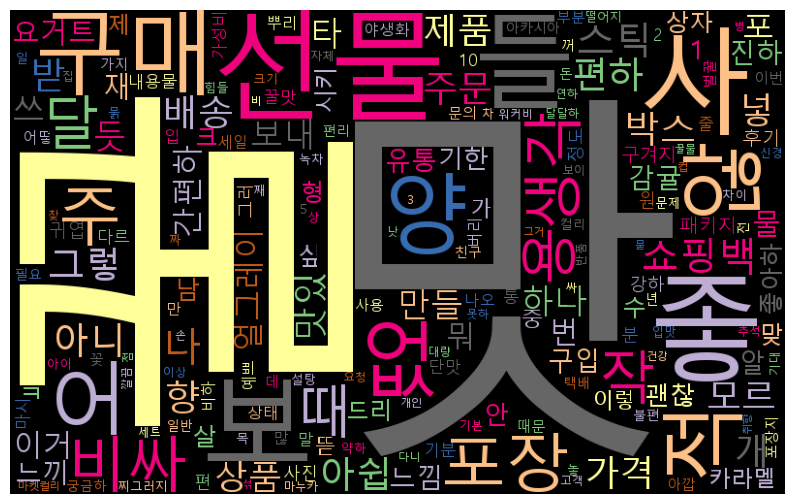

In [97]:
wc_analysis(neg_review['token_nouns_bareun'] + neg_review['token_verbs_bareun'])

In [105]:
frequency_analysis(neg_review['token_nouns_bareun'], 500).head(10)

,Token,Frequency
0,맛,182
1,꿀,172
2,선물,127
3,구매,93
4,양,87
5,포장,73
6,생각,61
7,용,60
8,쇼핑백,56
9,때,55


포장 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


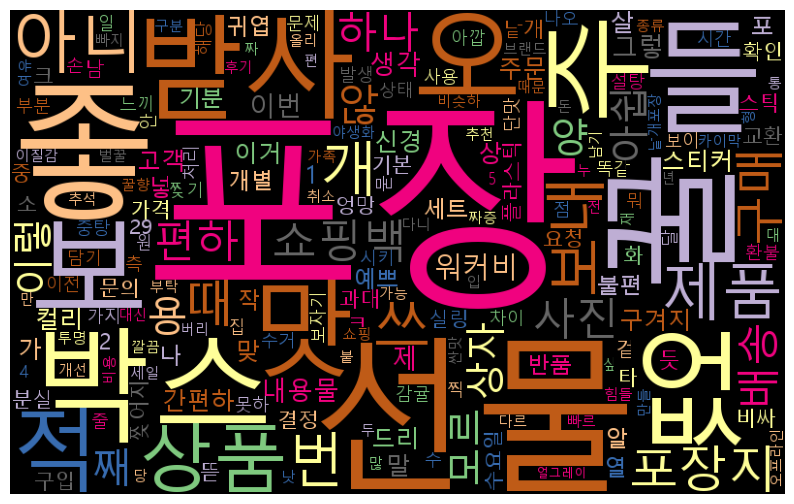

In [108]:
wc_kw(neg_review, 3, '포장')

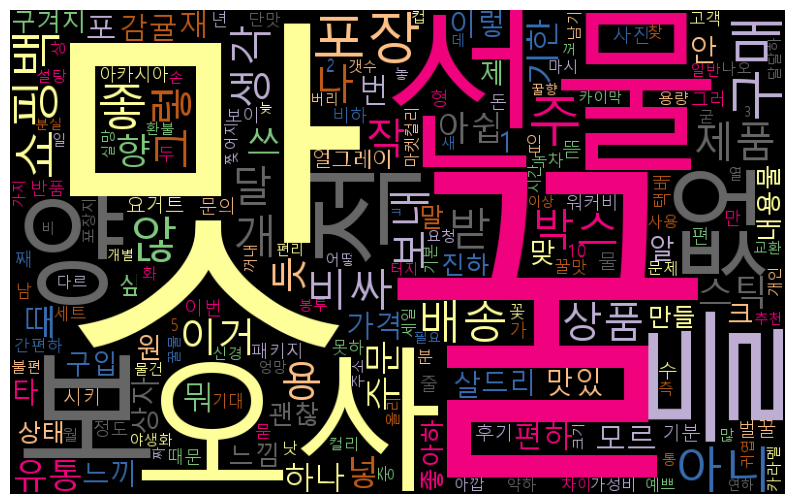

In [127]:
wc_analysis(neg_review[neg_review['sentiment_score']>0.9]['token_nouns_bareun'] + neg_review[neg_review['sentiment_score']>0.9]['token_verbs_bareun'])